# ML - Fall 2023 - Practical - 2
## Practical Homework 2 - Naive Bayes

Student Number: 400105144

Student Name: Amirhossein Alamdar





# Phase 0: Intro

**In this assignment, you will develop Naive Bayes models to perform text classification. The dataset contains texts and the feelings correspond to each text. Your goal is to make a model to predict the emotion associated with each given text.**

Importing necessary libraries

In [1]:
import nltk
import pandas
import sklearn
import string
import spacy
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# !wget -O /kaggle/working/dataset.csv https://www.dropbox.com/scl/fi/vezn3809mk6br6jb2xari/ML-P2-DataSet.csv?rlkey=yweu1fhtvisqhxm78s4ofpxed&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset **(P1-Sec1: 10 Points)**

Load the dataset. Look at the head of dataset. How many rows are there in the dataset? **(P1-1-1: 2 points)**




In [5]:
df = pd.read_csv('/kaggle/input/dataset/ML-P2-DataSet.csv')
df.head()

,Text,Feeling
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


Handle missing values **(P1-1-2: 2 pints)**

In [6]:
df = df.dropna()
len(df)

5937

Identify the unique feeling values and for each of them, print their count in the dataset. **(P1-1-3: 2 points)**

In [7]:
df2 = df.groupby(['Feeling'])['Feeling'].count()
df2

Feeling
anger    2000
fear     1937
joy      2000
Name: Feeling, dtype: int64

Plot a pie chart to display the occurance frequency of each genre that you found in the prevoius part. **(P1-1-4: 2 points)**

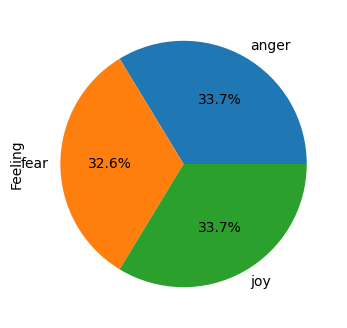

In [8]:
plot = df2.plot.pie(figsize=(4, 4), autopct='%1.1f%%')


Find the mean, max and min values of the length (in chars) of the Text Column. **(P1-1-5: 2 points)**


In [9]:
avg = df['Text'].str.len().mean()
min_len = df['Text'].str.len().min()
max_len = df['Text'].str.len().max()
print('avg len:', avg)
print('min len:', min_len)
print('max len:', max_len)

avg len: 97.42597271349166
min len: 9
max len: 298


# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 20 Points)**

In [10]:
from string import punctuation
class Preprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
    def preprocess(self, text):
        # TO DO
        pass

    def remove_links_and_tags(self, text):
        # TO DO
        pass

    def word_tokenize(self, text):
        return word_tokenize(text.lower())

    def remove_stopwords(self, words):
        tokens = word_tokenize(words.lower())
        return ' '.join([t for t in tokens if t not in self.stop_words])

    def remove_punctuations(self, words):
        return words.translate(str.maketrans('', '', punctuation))
    
    def remove_numbers(self, txt):
        return re.sub(r'[0-9]+', '', txt)
    
    def normalize(self, words):
        # TO DO
        pass

Inspect the dataset for any empty cells or duplicate rows, and if they are present, remove the corresponding rows from the dataset. **(P2-1-1: 5 points)**

In [11]:
# df[df.isna().any(axis=1)]

df = df.drop_duplicates()
df = df.dropna()
print(df.shape)
df

(5937, 2)


,Text,Feeling
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


Clean the Texts by removing the special characters and punctations. **(P2-1-2: 5 points)**

In [12]:
pre = Preprocessor()
df['Text'] = df['Text'].apply(pre.remove_punctuations)
df.head()

,Text,Feeling
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


Remove the stop-words from the synopsis texts. Stop-words are those that have a high frequency in the language but don't have much information like 'the', 'and', 'to', etc. **(P2-1-3: 5 points)**

In [13]:
df['Text'] = df['Text'].apply(pre.remove_stopwords)
df.head()

,Text,Feeling
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear


Tokenize the text and convert all characters to their lowercased version **(P2-1-4: 5 points)**

In [14]:
df['Text'] = df['Text'].apply(pre.word_tokenize)
df

,Text,Feeling
0,"[seriously, hate, one, subject, death, feel, r...",fear
1,"[im, full, life, feel, appalled]",anger
2,"[sit, write, start, dig, feelings, think, afra...",fear
3,"[ive, really, angry, r, feel, like, idiot, tru...",joy
4,"[feel, suspicious, one, outside, like, rapture...",fear
...,...,...
5932,"[begun, feel, distressed]",fear
5933,"[left, feeling, annoyed, angry, thinking, cent...",anger
5934,"[ever, get, married, everything, ready, offer,...",joy
5935,"[feel, reluctant, applying, want, able, find, ...",fear


# Phase 3: Training

## Sec 1: Preparing the training feed **(P3-Sec1: 20 Points)**

Extract the "X" and "y" numpy array from columns corresponding to text and feelings. **(P3-1-1: 5 Points)**

In [15]:
def undo(words):
    return ' '.join([word for word in words])
df['Text'] = df['Text'].apply(undo)
df.head()

,Text,Feeling
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear


In [16]:
X = df['Text'].to_numpy()
y = df['Feeling'].to_numpy()
X

array(['seriously hate one subject death feel reluctant drop',
       'im full life feel appalled',
       'sit write start dig feelings think afraid accept possibility might make',
       ...,
       'ever get married everything ready offer got together go clubs even perfect good looking guys feel intimated talking clever self',
       'feel reluctant applying want able find company know least one person',
       'wanted apologize feel like heartless bitch'], dtype=object)

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`) contains 80% of the samples. **(P3-1-2: 5 Points)**

In [17]:
n = int(0.8 * len(y)) + 1
x_train, y_train = X[:n], y[:n]
x_test, y_test = X[n:], y[:n]

Extract the text embeddings (feature vectors) for all the texts in the dataset. **(P3-1-3: 10 Points)**

For this task you can use **tf-idf** or **count vectorizer**. Search about them!

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
class Vectorizer():
    def data_to_vec(self, sentence, pre):
        tokens = pre.word_tokenize(sentence)
        res = np.zeros(len(self.features))
        for token in tokens:
            idx = np.where(token == self.features)
            if len(idx[0]) != 0:
                res[idx] += 1
        return res
    def vectorize(self, X, is_tf = False):
        if is_tf:
            vectorizer = TfidfVectorizer()
        else:
            vectorizer = CountVectorizer()
            embedding_matrix = vectorizer.fit_transform(X)
            self.features = vectorizer.get_feature_names_out()         
        return embedding_matrix
vec = Vectorizer()
emb = vec.vectorize(X, False)
print(emb.shape)

(5937, 8815)


In [19]:
n = int(0.8 * len(y)) + 1
x_train, y_train = emb[:n], y[:n]
x_test, y_test = emb[n:], y[n:]

## Sec 2: Naive Bayes from Scratch **(P3-Sec2: 20 Points)**

Complete this section with your code. **(P3-2: 20 points)**

In [20]:
class NaiveBayesClassifier:
    def __init__(self, alpha=1):

        '''
        Initialize these:

        Laplace smoothing parameter
        P(Y)
        P(X_i | Y)
        '''
        self.alpha = alpha
    
    def fit(self, X, y):
        
        
        '''
        Calculate class probabilities P(Y)

        Calculate word probabilities P(X_i | Y)
        '''
        # TO DO
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        n_classes = self.n_classes
        self.prior = np.zeros(n_classes, dtype = np.float64)
        self.probs = np.zeros((n_classes, n_features), dtype = np.float64)
        for idx, c in enumerate(self.classes): 
            X_c = X[c==y]
            self.prior[idx] = X_c.shape[0] / float(X.shape[0])
            X_c = np.sum(X_c, axis = 0)
            sm = np.sum(X_c, dtype = np.float64)
            self.probs[idx] = (X_c+self.alpha)/ (sm + self.alpha*self.n_classes)
        self.probs = np.log(self.probs)
        self.prior = np.log(self.prior)
    def predict(self, X):
        '''
        Calculate the log likelihood of the sample for each class

        Predict the class with the highest score
        '''
        res = np.array([])
        for sample in X:
            posteriors = np.zeros(self.n_classes)
            for idx,c in enumerate(self.classes):
                prior = self.prior[idx]
                class_conditional = np.sum((sample*self.probs[idx]))
                posterior = prior + class_conditional
                posteriors[idx] = posterior
            res = np.append(res, self.classes[np.argmax(posteriors)])
        return res
     
    

## Sec 3: Fit models to the training data **(P3-Sec3: 10 Points)**

Fit a Naive Bayes classifier to the data. (Use both regressors - sklearn & from scratch) **(P3-3-1: 10 points)**

In [21]:
my_model = NaiveBayesClassifier(1)
my_model.fit(x_train, y_train)


In [22]:
clf = MultinomialNB(force_alpha=True)
clf.fit(x_train, y_train)

MultinomialNB(force_alpha=True)

# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results (P4-Sec1: 20 points)

Predict the value of "y" for each "x" belonging to the "testing" set (use both models) **(P4-1-1: 5 points)**

In [23]:
sk_pred = clf.predict(x_test)


In [24]:
my_pred = my_model.predict(x_test)

Compute Confusion matrix and classification report for each model **(P4-1-2: 10 points)**

In [25]:
# my_pred.shape
# y_test.shape

my_acc = my_pred[my_pred==y_test].shape[0] / y_test.shape[0]
sk_acc = sk_pred[sk_pred==y_test].shape[0] / y_test.shape[0]
print('my acc:', my_acc)
print('sk_acc:', sk_acc)

my acc: 0.8972198820556023
sk_acc: 0.9014321819713563


In [26]:
from sklearn.metrics import classification_report
print('my model:\n',confusion_matrix(y_test, my_pred))
print(classification_report(y_test, my_pred))
print('sk model:\n',confusion_matrix(y_test, sk_pred))
print(classification_report(y_test, sk_pred))

my model:
 [[357  24   9]
 [ 23 370   9]
 [ 26  31 338]]
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       390
        fear       0.87      0.92      0.89       402
         joy       0.95      0.86      0.90       395

    accuracy                           0.90      1187
   macro avg       0.90      0.90      0.90      1187
weighted avg       0.90      0.90      0.90      1187

sk model:
 [[357  21  12]
 [ 24 365  13]
 [ 26  21 348]]
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       390
        fear       0.90      0.91      0.90       402
         joy       0.93      0.88      0.91       395

    accuracy                           0.90      1187
   macro avg       0.90      0.90      0.90      1187
weighted avg       0.90      0.90      0.90      1187



Explain the results of the previous section (what is f1-score? - what is the recall? - what is precision?), also compare the model's performance **(P4-1-3: 5 points)**

***in general, precision is rate of true positives amongs all positive classified samples. It's importan to us how much our model is precise and when it says a sample is positive, what is the chance of its realy being positive.***

***but recall is rate of the actual positvie samples that classified as positives. for example in some medical applications, its important that if a sample is postive and has an illness, we return positive. we want to cover all positive cases for sure.***
![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*7J08ekAwupLBegeUI8muHA.png)


***f1 score is calculated based on this 2 measures. it tries to make a balance between recall and precision. And if there is an uneven class distribution, this measurement will help us a lot***

![](https://miro.medium.com/v2/resize:fit:564/format:webp/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)


***as you can see sklearn is a little bit better(in both acc and f1), but f1 scores are so close. based on cofusion matrix, one of my model biggest issues is classifying a lot of joy emotions into fear.***

Model Performance Intuition Part: Now, you can test whether your model has a good prediction for a random text.

In [27]:
def datatransform(lst, pre, vec):
    pre = Preprocessor()
    data = np.array([])
    for i in range(len(lst)):
        lst[i] = pre.remove_stopwords(lst[i])
        lst[i] = pre.remove_punctuations(lst[i])
        data = np.append(data, vec.data_to_vec(lst[i], pre))
    return [data]
example = datatransform(["Look! behind that tree there is a secret object, I am so scared"], pre, vec)
my_model.predict(example)

array(['fear'], dtype='<U32')

# Phase 5: Neural Net (Bonus)

In [28]:
import gensim
import pandas as pd
import re
import string
import spacy
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
config = {
    'batch_size': 64,
    'learning_rate': 1,
    'word2vec_path': '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin',
    'dataset_path': '../input/twitter-tweets-sentiment-dataset/Tweets.csv',
    'num_epochs': 100, 
    'max_len': 20,
    'training_size': 0.8,
    'random_seed': 50,
    
}


In [29]:
def prep():
    bdf = pd.read_csv('/kaggle/input/dataset/ML-P2-DataSet.csv')
    bpre = Preprocessor()
    bdf['Text'] = bdf['Text'].apply(bpre.remove_stopwords)
    bdf['Text'] = bdf['Text'].apply(bpre.remove_punctuations)
    bdf['Text'] = bdf['Text'].apply(bpre.remove_numbers)
    bdf = bdf.dropna()
    bdf = pd.get_dummies(bdf, columns = ['Feeling'], dtype = int)
    return bdf
bdf = prep()

Make a list of words available in the dataset

Retrieve the Word2Vec embeddings for each word

In [30]:
word2vec_path = config['word2vec_path']
w2v = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path,binary=True)

In [31]:
texts = df['Text'].to_list()
texts = [[token for token in text.split() if token in w2v.key_to_index] for text in texts]
print(texts[0])
mapped_texts = [[w2v.key_to_index[token] for token in tokens_list] for tokens_list in texts]
print(mapped_texts[0])

['seriously', 'hate', 'one', 'subject', 'death', 'feel', 'reluctant', 'drop']
[2846, 4293, 45, 1255, 570, 574, 6454, 1223]


In [32]:
labels = bdf[['Feeling_anger', 'Feeling_fear', 'Feeling_joy']].values.tolist()
labels = np.array(labels)
labels

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [33]:
def pad_seq(seq):
    if len(seq) < config['max_len']:
        seq.extend([0] * (config['max_len'] - len(seq)))
    elif len(seq) > config['max_len']:
        seq = seq[:config['max_len']]
    return seq


In [34]:
f_train, f_rem, l_train, l_rem = train_test_split(mapped_texts, labels, test_size=1-config['training_size'], random_state=config['random_seed'])
f_test, f_dev, l_test, l_dev = train_test_split(f_rem, l_rem, test_size=0.5, random_state=config['random_seed'])

In [35]:
class W2VDataset(Dataset):
    def __init__(self, mapped_texts, labels):
        self.token_lists = [pad_seq(mt) for mt in mapped_texts]
        self.labels = np.array(labels)
    def __len__(self):
        return len(self.token_lists)
    def __getitem__(self, idx):        
        return torch.LongTensor(self.token_lists[idx]).cuda(), torch.Tensor(self.labels[idx]).cuda()

In [36]:
train_dataset = W2VDataset(f_train, l_train)
test_dataset = W2VDataset(f_test, l_test)
dev_dataset = W2VDataset(f_dev, l_dev)
train_dataloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=config['batch_size'], shuffle=True)

In [37]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(w2v.vectors))
        self.lstm = nn.LSTM(input_size=300, hidden_size=300, batch_first=True)
        self.dense = nn.Linear(300, 3)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        output = self.embedding(x) # output shape: (batch_size, seq_len, embedding_dim)
        output, _ = self.lstm(output) # output shape: (batch_size, seq_len, hidden_size)
        output = self.dense(output[:, -1, :]) # output shape: (batch_size, 1)
        output = self.activation(output)
        return output

Train a neural network consisting of LSTM and Fully-Connected layers to perform text classification **(P5-1: 8 points)**

In [38]:
torch.cuda.empty_cache() 
model = Model().cuda()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=config['learning_rate'])

def output_to_label(out):
    lbl = np.zeros(3, dtype = int)
    lbl[np.argmax(out)] = 1    
    return lbl

In [39]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch_num):
    num_points = len(dataloader.dataset)
    for batch, (features, labels) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(features)
#         print(pred[0])
        loss = loss_fn(pred, labels)
        
        # Backpropagation
        optimizer.zero_grad() # sets gradients of all model parameters to zero
        loss.backward() # calculate the gradients again
        optimizer.step() # w = w - learning_rate * grad(loss)_with_respect_to_w

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(features)
            print(f"\r Epoch {epoch_num} - loss: {loss:>7f}", end=" ")
            
def test_loop(dataloader, model, loss_fn, epoch_num, name):
    num_points = len(dataloader.dataset)
    sum_test_loss, correct = 0, 0

    with torch.no_grad():
        for batch, (features, labels) in enumerate(dataloader):
            pred = model(features)
            sum_test_loss += loss_fn(pred, labels).item() # add the current loss to the sum of the losses
            # convert the outputs of the model on the current batch to a numpy array
            pred_lst = list(pred.cpu().detach().numpy().squeeze())
            pred_lst = [output_to_label(item) for item in pred_lst]
            # convert the original labels corresponding to the current batch to a numpy array
            output_lst = list(labels.cpu().detach().numpy().squeeze()) 
            # determine the points for which the model is correctly predicting the label (add a 1 for each)
            output_lst = [el.astype(int) for el in output_lst] 
            #TODO
            match_lst = [1 if (p==o).all() else 0 for (p, o) in zip(pred_lst, output_lst)] 
            # count how many points are labeled correctly in this batch and add the number to the overall count of the correct labeled points
            correct += sum(match_lst) 
            
    sum_test_loss /= num_points
    correct /= num_points
    print(f"\r Epoch {epoch_num} - {name} Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {sum_test_loss:>8f}", end=" ")

Note: To get the points, Your neural net's performance should be at least as good as the Naive Bayes classifier. The exact architecture of the neural net is up to you. You can use Pytorch or Tensorflow to train it.

Evaluate the neural net on the training and testing data from the section *3-1-2*. **(P5-2: 2 points)**

In [40]:
torch.cuda.empty_cache() 
for epoch_num in range(1, config['num_epochs']+1):
    train_loop(train_dataloader, model, loss_fn, optimizer, epoch_num)
    test_loop(dev_dataloader, model, loss_fn, epoch_num, 'Development/Validation')
    

 Epoch 100 - Development/Validation Error: Accuracy: 96.3%, Avg loss: 0.002133 

In [41]:
test_loop(test_dataloader, model, loss_fn, epoch_num, 'Test')
torch.cuda.empty_cache() 


 Epoch 100 - Test Error: Accuracy: 96.1%, Avg loss: 0.001618 

# Phase 6 (Optional): Submit your predictions to our Kaggle competition

In [42]:
import gensim
import pandas as pd
import re
import string
import spacy
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import nltk
import pandas
import sklearn
import string
import spacy
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
config = {
    'batch_size': 64,
    'learning_rate': 1,
    'word2vec_path': '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin',
    'dataset_path': '../input/twitter-tweets-sentiment-dataset/Tweets.csv',
    'num_epochs': 200, 
    'max_len': 20,
    'training_size': 0.9,
    'random_seed': 0,
    
}
class Preprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))   
#         self.lemmatizer = WordNetLemmatizer()
        self.load_model = spacy.load('en_core_web_sm', disable = ['parser','ner'])
    def preprocess(self, text):
        # TO DO
        pass

    def remove_links_and_tags(self, text):
        # TO DO
        pass

    def word_tokenize(self, text):
        return word_tokenize(text.lower())

    def remove_stopwords(self, words):
        tokens = word_tokenize(words.lower())
        return ' '.join([t for t in tokens if t not in self.stop_words])

    def remove_punctuations(self, words):
        return words.translate(str.maketrans('', '', punctuation))
    
    def remove_numbers(self, txt):
        return re.sub(r'[0-9]+', '', txt)
    def lemmatize(self, txt):
        doc = self.load_model(txt)
        return " ".join([token.lemma_ for token in doc])
    def normalize(self, words):
        # TO DO
        pass
def p(address, isTest=False):
    bdf = pd.read_csv(address)
    bdf.head()
    bpre = Preprocessor()
    bdf['Text'] = bdf['Text'].apply(bpre.remove_stopwords)
    bdf['Text'] = bdf['Text'].apply(bpre.remove_punctuations)
    bdf['Text'] = bdf['Text'].apply(bpre.remove_numbers)
    bdf['Text'] = bdf['Text'].apply(bpre.lemmatize)
    bdf = bdf.dropna()
#     bdf['label'] = bdf['target'].apply(to_int)
    if not isTest:
        bdf = pd.get_dummies(bdf, columns = ['target'], dtype = int)
    return bdf

# Print and check some details about the dataset
test_df = p('/kaggle/input/testcomp/test (1).csv', True)
test_df = test_df.drop(['ID'], axis = 1)

cdf = p('/kaggle/input/traincomp/train (1).csv')
cdf = cdf.drop(['ID'], axis = 1)
cdf

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,target_anger,target_fear,target_joy
0,send home still feel bit shaky dizzy,0,1,0
1,feel like little control help sweet pea well k...,0,0,1
2,never happy feel accept whole life,0,0,1
3,wake feel grouchy irritable feel settle day re...,1,0,0
4,hope feel mellow well feed well sleep peace wi...,0,0,1
...,...,...,...,...
5338,admit feel little envious hear young writer well,1,0,0
5339,feel angry feel self conscious short wish be n...,1,0,0
5340,try come idea feel clever keep piece fun make ...,0,0,1
5341,could nt help feel little envious treat body p...,1,0,0


In [43]:
word2vec_path = config['word2vec_path']
w2v = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path,binary=True)

In [44]:
texts = cdf['Text'].to_list()
texts = [[token for token in text.split() if token in w2v.key_to_index] for text in texts]
print(texts[0])
mapped_texts = [[w2v.key_to_index[token] for token in tokens_list] for tokens_list in texts]
print(mapped_texts[0])

t_texts = test_df['Text'].to_list()
t_texts = [[token for token in text.split() if token in w2v.key_to_index] for text in t_texts]
t_mapped_texts = [[w2v.key_to_index[token] for token in tokens_list] for tokens_list in t_texts]
t_mapped_texts[0]

['send', 'home', 'still', 'feel', 'bit', 'shaky', 'dizzy']
[1257, 124, 151, 574, 738, 9999, 37282]


[20,
 6869,
 574,
 4518,
 140,
 16,
 103832,
 7960,
 2435,
 2555,
 204,
 6624,
 574,
 7790,
 773,
 47,
 901]

In [45]:
def pad_seq(seq):
    if len(seq) < config['max_len']:
        seq.extend([0] * (config['max_len'] - len(seq)))
    elif len(seq) > config['max_len']:
        seq = seq[:config['max_len']]
    return seq
labels = cdf[['target_anger', 'target_fear', 'target_joy']].values.tolist()
labels = np.array(labels)
labels

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [46]:
f_train, f_dev, l_train, l_dev = train_test_split(mapped_texts, labels, test_size=1-config['training_size'], random_state=config['random_seed'])

In [47]:
class W2VDataset(Dataset):
    def __init__(self, mapped_texts, labels):
        self.token_lists = [pad_seq(mt) for mt in mapped_texts]
        self.labels = np.array(labels)
    def __len__(self):
        return len(self.token_lists)
    def __getitem__(self, idx):        
        return torch.LongTensor(self.token_lists[idx]).cuda(), torch.Tensor(self.labels[idx]).cuda()

In [48]:
train_dataset = W2VDataset(f_train, l_train)
dev_dataset = W2VDataset(f_dev, l_dev)
test_dataset = W2VDataset(t_mapped_texts, np.zeros((len(t_mapped_texts), 3), dtype =int))
train_dataloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=config['batch_size'], shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=config['batch_size'])

In [49]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(w2v.vectors))
        self.lstm = nn.LSTM(input_size=300, hidden_size=300, batch_first=True)
        self.dense = nn.Linear(300, 3)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        output = self.embedding(x) # output shape: (batch_size, seq_len, embedding_dim)
        output, _ = self.lstm(output) # output shape: (batch_size, seq_len, hidden_size)
        output = self.dense(output[:, -1, :]) # output shape: (batch_size, 1)
        output = self.activation(output)
        return output

In [50]:
torch.cuda.empty_cache() 
model = Model().cuda()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=config['learning_rate'])

def output_to_label(out):
    lbl = np.zeros(3, dtype = int)
    lbl[np.argmax(out)] = 1    
    return lbl

In [51]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch_num):
    num_points = len(dataloader.dataset)
    for batch, (features, labels) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(features)
#         print(pred[0])
        loss = loss_fn(pred, labels)
        
        # Backpropagation
        optimizer.zero_grad() # sets gradients of all model parameters to zero
        loss.backward() # calculate the gradients again
        optimizer.step() # w = w - learning_rate * grad(loss)_with_respect_to_w

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(features)
            print(f"\r Epoch {epoch_num} - loss: {loss:>7f}", end=" ")
            
def test_loop(dataloader, model, loss_fn, epoch_num, name, isFinal=False):
    num_points = len(dataloader.dataset)
    sum_test_loss, correct = 0, 0

    with torch.no_grad():
        res = []
        for batch, (features, labels) in enumerate(dataloader):
            pred = model(features)
            sum_test_loss += loss_fn(pred, labels).item() # add the current loss to the sum of the losses
            # convert the outputs of the model on the current batch to a numpy array
            pred_lst = list(pred.cpu().detach().numpy().squeeze())
            pred_lst = [output_to_label(item) for item in pred_lst]
            res += pred_lst
            # determine the points for which the model is correctly predicting the label (add a 1 for each)
            
            if not isFinal:
                # convert the original labels corresponding to the current batch to a numpy array
                output_lst = list(labels.cpu().detach().numpy().squeeze()) 
                
                output_lst = [el.astype(int) for el in output_lst] 
                #TODO
                match_lst = [1 if (p==o).all() else 0 for (p, o) in zip(pred_lst, output_lst)] 
                # count how many points are labeled correctly in this batch and add the number to the overall count of the correct labeled points
                correct += sum(match_lst) 
    if not isFinal:        
        sum_test_loss /= num_points
        correct /= num_points
        print(f"\r Epoch {epoch_num} - {name} Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {sum_test_loss:>8f}", end=" ")
    if isFinal:
        return res

In [52]:
torch.cuda.empty_cache() 
for epoch_num in range(1, config['num_epochs']+1):
    train_loop(train_dataloader, model, loss_fn, optimizer, epoch_num)
    test_loop(dev_dataloader, model, loss_fn, epoch_num, 'Development/Validation')
torch.cuda.empty_cache() 

 Epoch 200 - Development/Validation Error: Accuracy: 94.6%, Avg loss: 0.003138 

In [53]:
res = test_loop(test_dataloader, model, loss_fn, epoch_num, 'Test', True)
for i in range(len(res)):
    if res[i][0] == 1:
        res[i] = 'anger'
    elif res[i][1] == 1:
        res[i] = 'fear'
    else:
        res[i] = 'joy'
        
DF = pd.DataFrame(np.array(res))
# save the dataframe as a csv file
DF.to_csv("/kaggle/working/res.csv")

Competition Link: WILL BE ADDED HERE